In [1]:
import ROOT
import rootnotes
c1 = rootnotes.default_canvas()

In [2]:
identifier = "ggfZZ" # avaliable: ggfWW, vbfWW, vbfZZ, ggfZZ, vbfMuMu 
infilename = "/eos/user/v/vcroft/morphingInputs/ggfhzz4l_2d.root" # give the input file name here
observable = "base/phi" # name of the observable to be used (histogram name)

names of input samples

In [3]:
samplelist = ["s1","s2","s3"]
# these are the validation samples: "v0","v1"

push all the input samples in a RooArgList

In [4]:
inputs = ROOT.RooArgList()

we need the additional list "inputnames" to prevent the python garbage collector from deleting the RooStringVars

In [5]:
inputnames = []
for sample in samplelist:
    v = ROOT.RooStringVar(sample,sample,sample)
    inputnames.append(v)
    inputs.add(v)

setup predefined morphfunc by hand

In [6]:
morphfunc = ROOT.RooHCggfZZMorphFunc(identifier,identifier,infilename,observable,inputs)

In [7]:
standardmodel = "s1"
morphfunc.setParameters(standardmodel)

loop over the input samples

In [8]:
ymin = 0.
ymax = 0.
graphs = []
for s in samplelist:
  # retrieve the weight of the corresponding input sample
  w = morphfunc.getSampleWeight(s)
  g = ROOT.TGraphErrors()
  g.SetTitle(s)
  # scan over a couple of points to fill the graph
  for i,xval in enumerate(range(-5,5)):
      morphfunc.setParameter("kAzz",xval)
      yval = w.getVal()
      g.SetPoint(i,xval,yval)
      ymax = max(yval,ymax)
      ymin = min(yval,ymin)
      i = i + 1
  graphs.append(g)

now plot everything

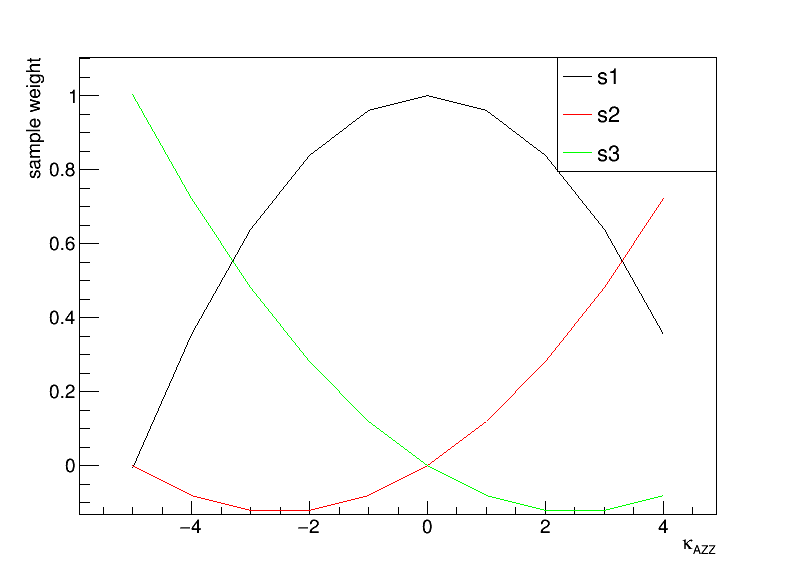

In [9]:
leg = ROOT.TLegend(0.7,0.7,0.9,0.9)
counter = 0
ymin = min(0.9*ymin,1.1*ymin)
ymax = 1.1*ymax
ROOT.gStyle.SetOptTitle(False)
for g in graphs:
    g.SetLineColor(counter+1)
    leg.AddEntry(g,g.GetTitle(),"l")
    if counter==0:
        g.GetYaxis().SetRangeUser(ymin,ymax)
        g.Draw("AL")
        g.GetXaxis().SetTitle("#kappa_{AZZ}")
        g.GetYaxis().SetTitle("sample weight")
    else:
        g.Draw("L")
    counter = counter+1
leg.Draw()
c1